## Logistic Regression

In [9]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# view all columns in the dataframe
pd.set_option('display.max_columns', None)

In [10]:
from matplotlib import style

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [11]:
plt.style.use('_classic_test_patch')

In [12]:
# load the dataset
air_sat = pd.read_csv(r'/content/drive/MyDrive/ML - Classification /Airline Passenger Satisfaction/Invistico_Airline.csv')

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# top 5 records
air_sat.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [15]:
# number of unique values
for x in air_sat.columns:
    print(x, air_sat[x].nunique())

satisfaction 2
Gender 2
Customer Type 2
Age 75
Type of Travel 2
Class 3
Flight Distance 5398
Seat comfort 6
Departure/Arrival time convenient 6
Food and drink 6
Gate location 6
Inflight wifi service 6
Inflight entertainment 6
Online support 6
Ease of Online booking 6
On-board service 6
Leg room service 6
Baggage handling 5
Checkin service 6
Cleanliness 6
Online boarding 6
Departure Delay in Minutes 466
Arrival Delay in Minutes 472


In [16]:
# null vaslues
for x in air_sat.columns:
    print(x, air_sat[x].isnull().sum())

satisfaction 0
Gender 0
Customer Type 0
Age 0
Type of Travel 0
Class 0
Flight Distance 0
Seat comfort 0
Departure/Arrival time convenient 0
Food and drink 0
Gate location 0
Inflight wifi service 0
Inflight entertainment 0
Online support 0
Ease of Online booking 0
On-board service 0
Leg room service 0
Baggage handling 0
Checkin service 0
Cleanliness 0
Online boarding 0
Departure Delay in Minutes 0
Arrival Delay in Minutes 393


In [17]:
# dtypes
for x in air_sat.columns:
    print(x, air_sat[x].dtypes)

satisfaction object
Gender object
Customer Type object
Age int64
Type of Travel object
Class object
Flight Distance int64
Seat comfort int64
Departure/Arrival time convenient int64
Food and drink int64
Gate location int64
Inflight wifi service int64
Inflight entertainment int64
Online support int64
Ease of Online booking int64
On-board service int64
Leg room service int64
Baggage handling int64
Checkin service int64
Cleanliness int64
Online boarding int64
Departure Delay in Minutes int64
Arrival Delay in Minutes float64


## Exploratory Data Analysis

### Target Variable

In [18]:
# Target variable
# value counts
air_sat.satisfaction.value_counts()

,count
satisfaction,
satisfied,71087
dissatisfied,58793


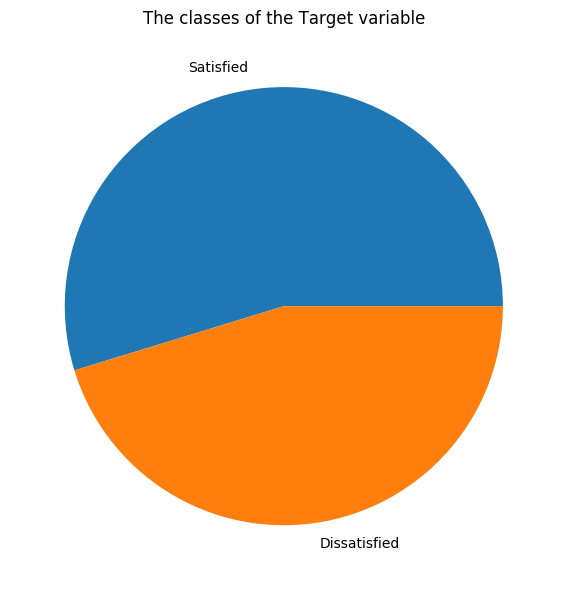

In [19]:
# pie chart
plt.figure(figsize = (6, 6))
slices = air_sat['satisfaction'].value_counts()
labels = ['Satisfied', 'Dissatisfied']
plt.pie(x = slices, labels = labels)
plt.title('The classes of the Target variable')
plt.tight_layout()
plt.show()

- **This is a balanced dataset**

<Figure size 1200x500 with 0 Axes>

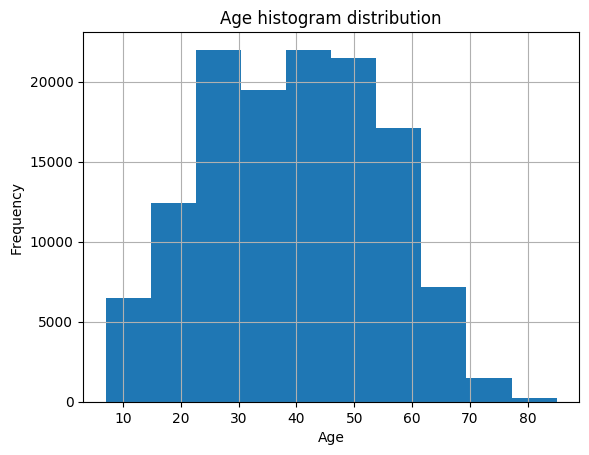

<Figure size 1200x500 with 0 Axes>

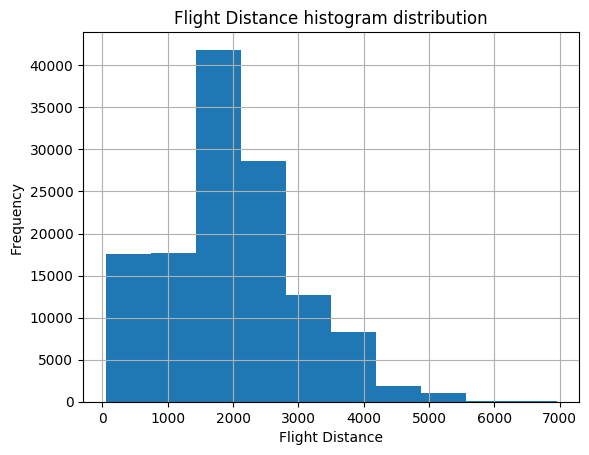

<Figure size 1200x500 with 0 Axes>

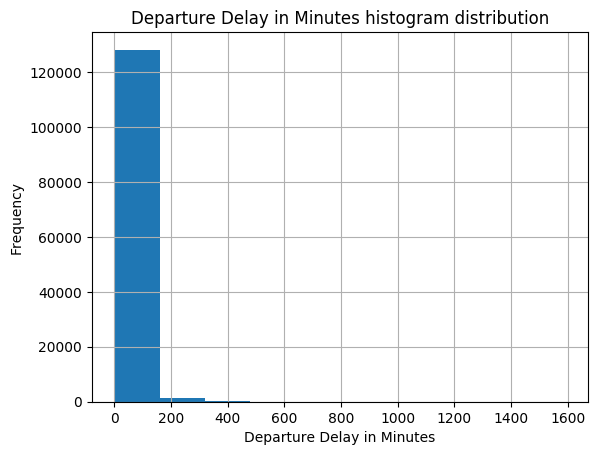

<Figure size 1200x500 with 0 Axes>

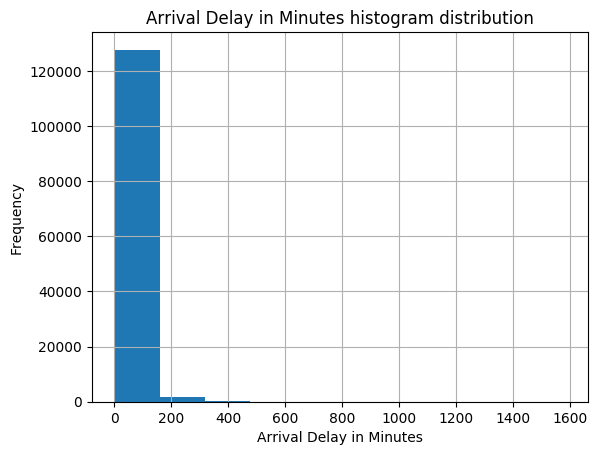

In [20]:
### Numerical variable
num_var = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# histogram distribution of numerical variable
for feature in num_var:
    # copy the dataframe
    df=air_sat.copy()
    plt.figure(figsize=(12, 5))
    df.hist(feature)
    plt.title(f'{feature} histogram distribution')
    plt.ylabel('Frequency')
    plt.xlabel(feature)
    plt.show()

#### The 'Age'  follow a gaussian distribution, but the 'Flight Distance' ,'Departure Delay in Minutes' and 'Arrival Delay in Minutes' variable are right skewed. This is due to the presence of ouliers

### Let's plot boxplot to detect outliers

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


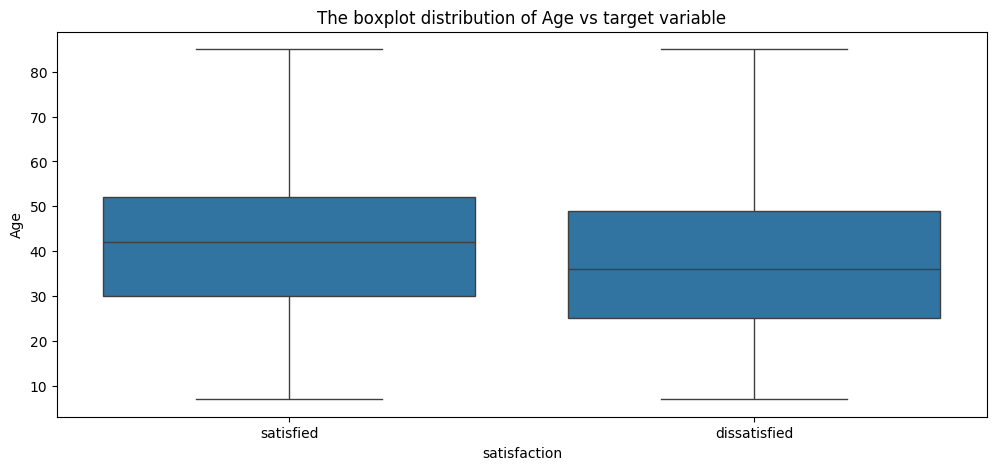

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


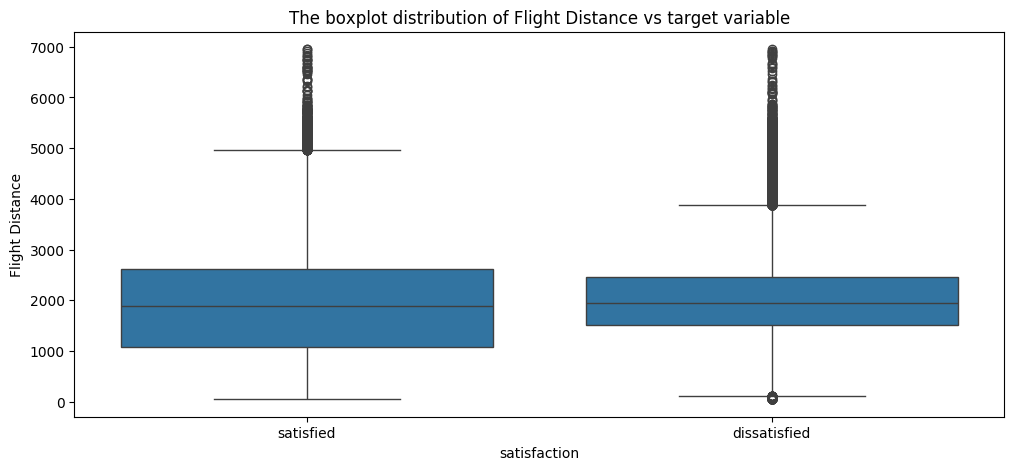

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


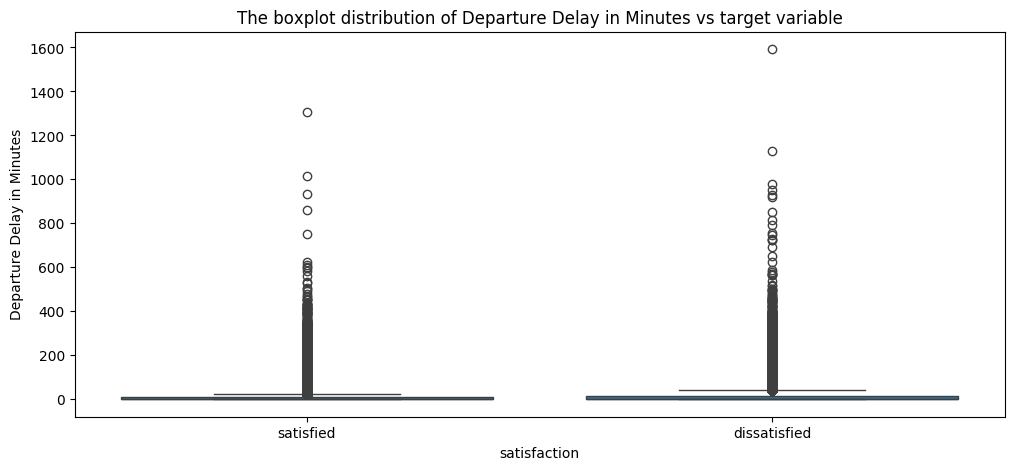

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


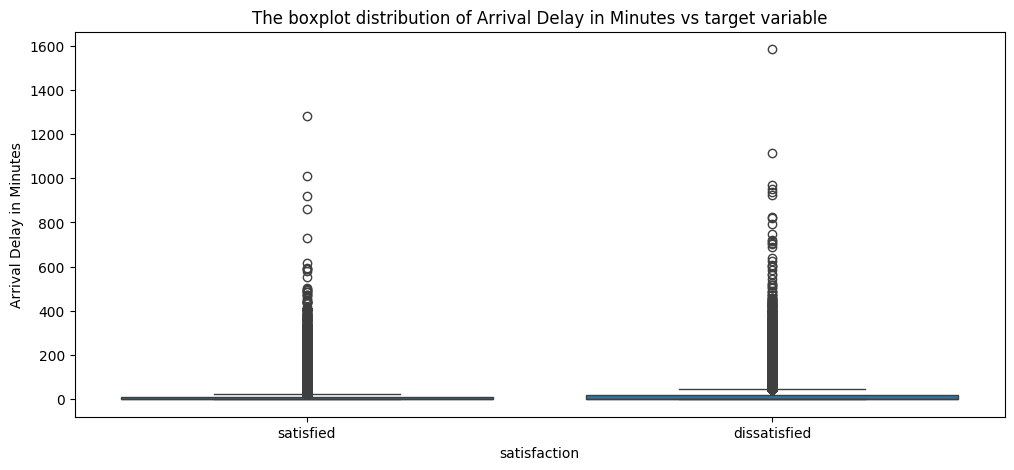

In [21]:
# box plots of numerical variable
for feature in num_var:
    # make copy of the dataframe
    df=air_sat.copy()
    # plot a box plot
    plt.figure(figsize=(12, 5))
    sns.boxplot(x = 'satisfaction', y = feature, data = df)
    plt.title(f'The boxplot distribution of {feature} vs target variable')
    plt.show()

- **The boxplot reveals the presence of outliers in the 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes' features**

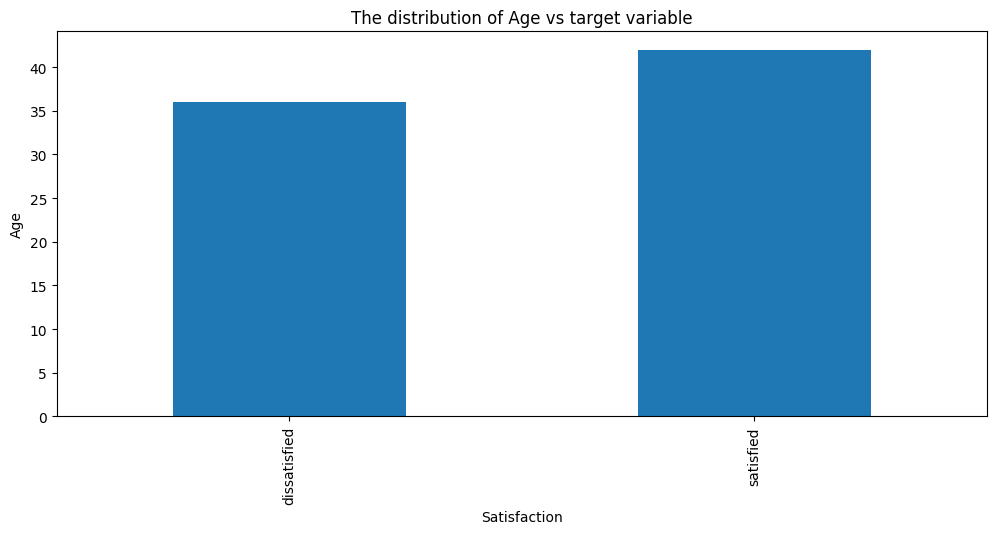

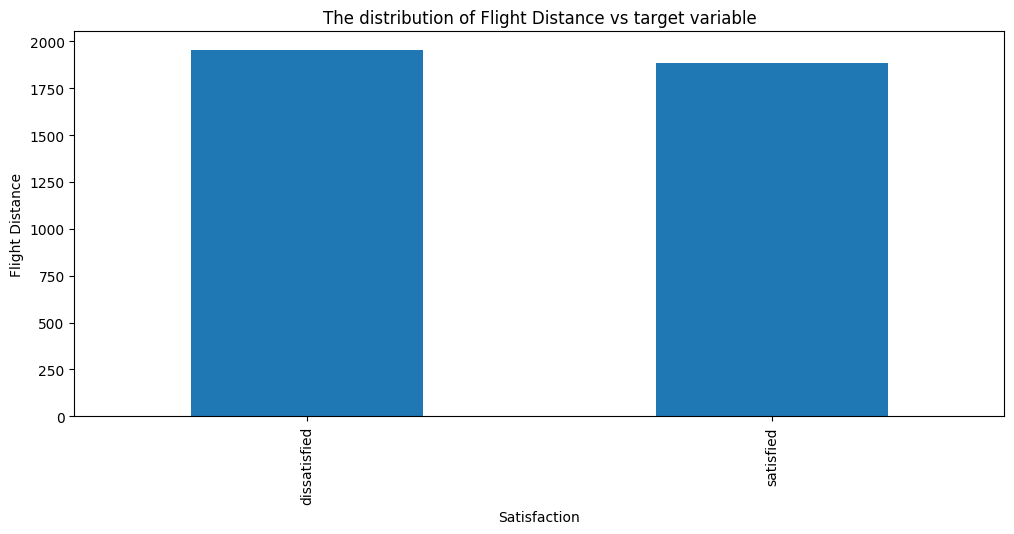

In [22]:
# histogram distribution of the numerical variable
for feature in ['Age', 'Flight Distance']:
    # copy the dataframe
    df=air_sat.copy()
    plt.figure(figsize=(12, 5))
    df.groupby('satisfaction')[feature].median().plot.bar()
    plt.title(f'The distribution of {feature} vs target variable')
    plt.ylabel(feature)
    plt.xlabel('Satisfaction')
    plt.show()

### Categorical variables.


#### Some of the the features though with the 'int64' dtype are Ordinal Categorical variables

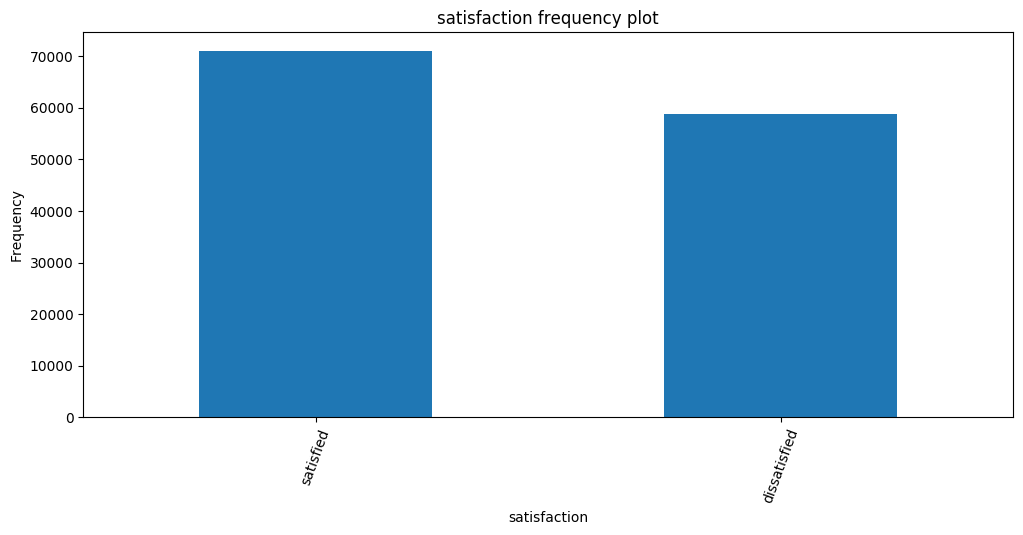

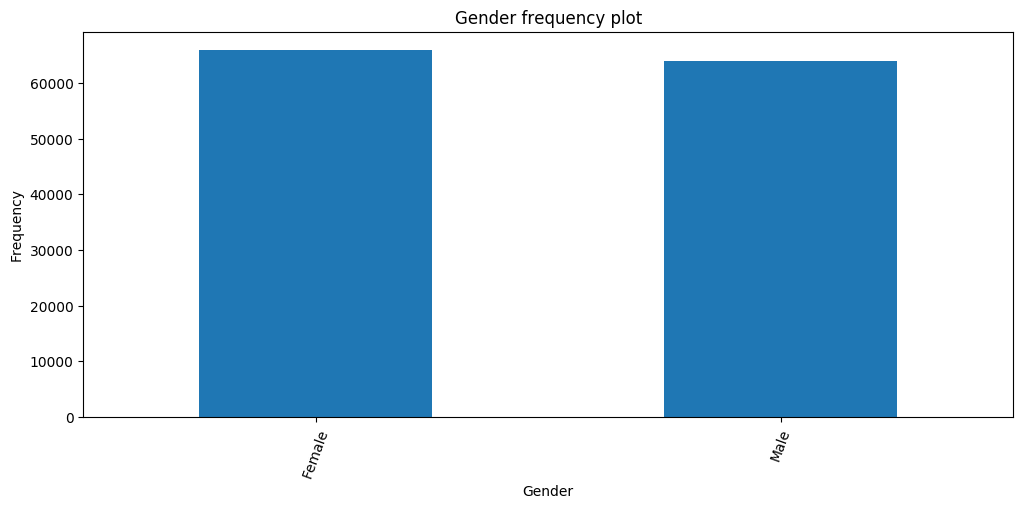

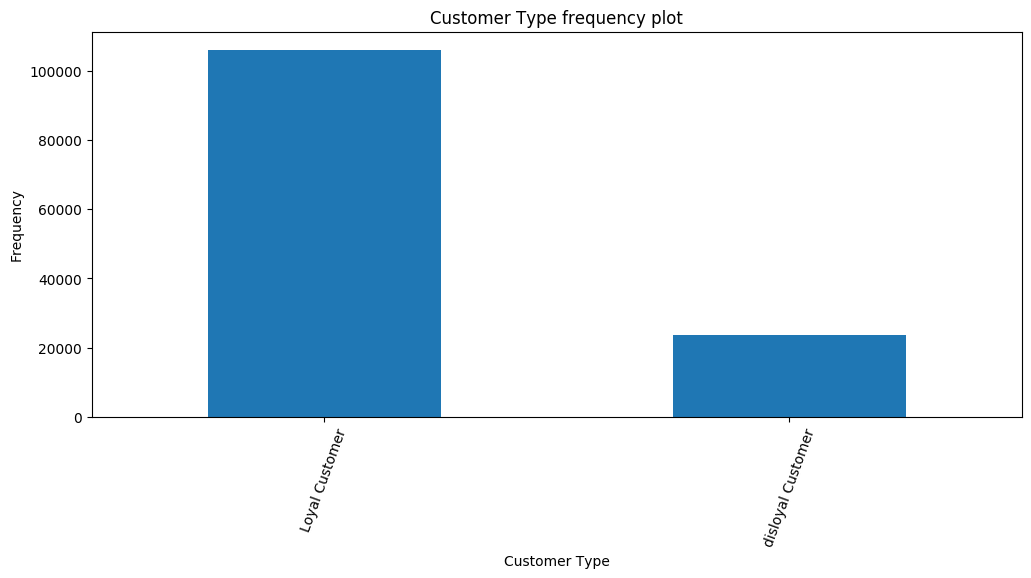

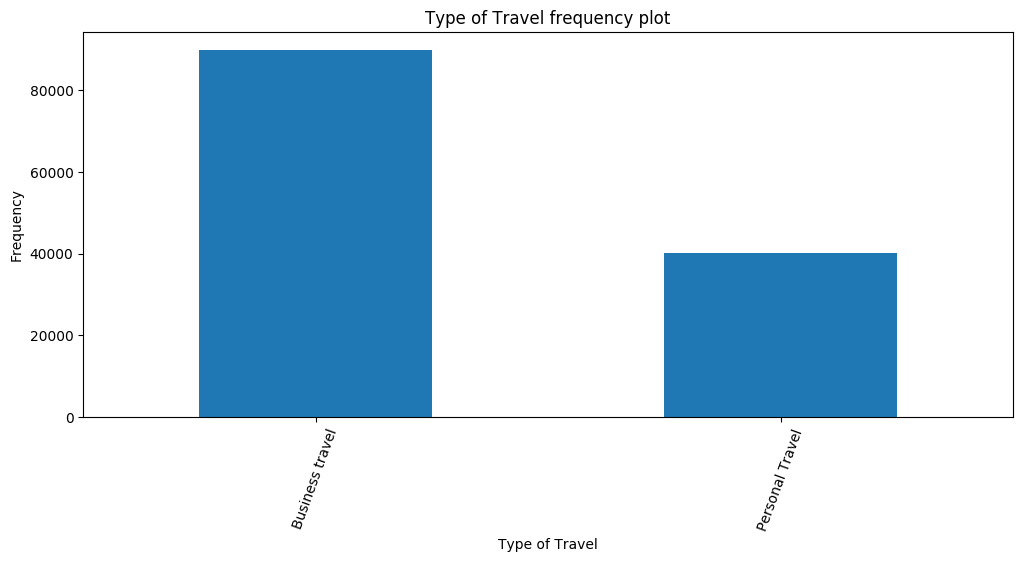

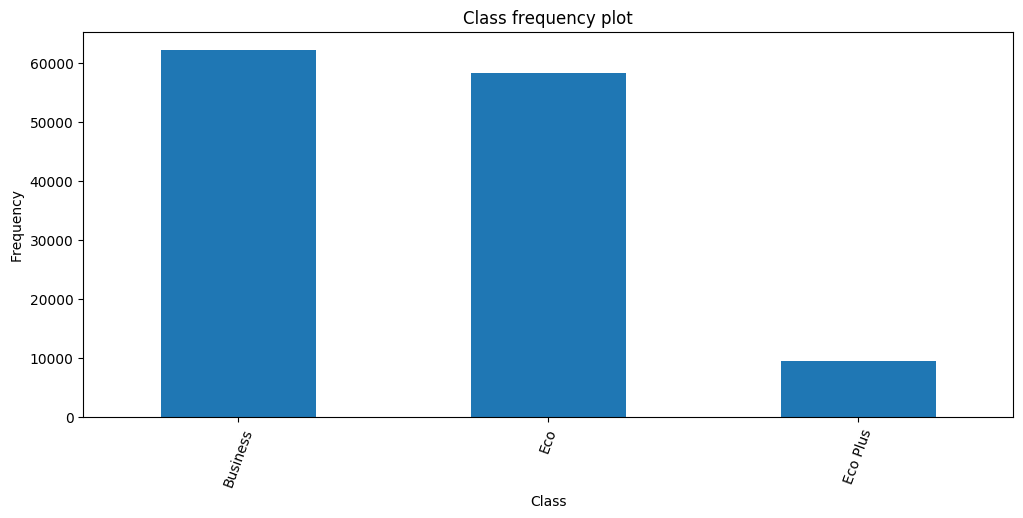

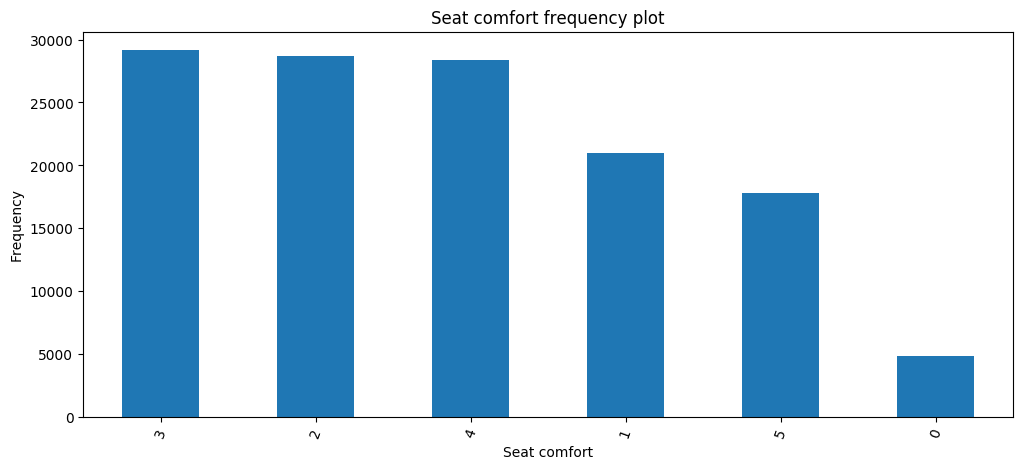

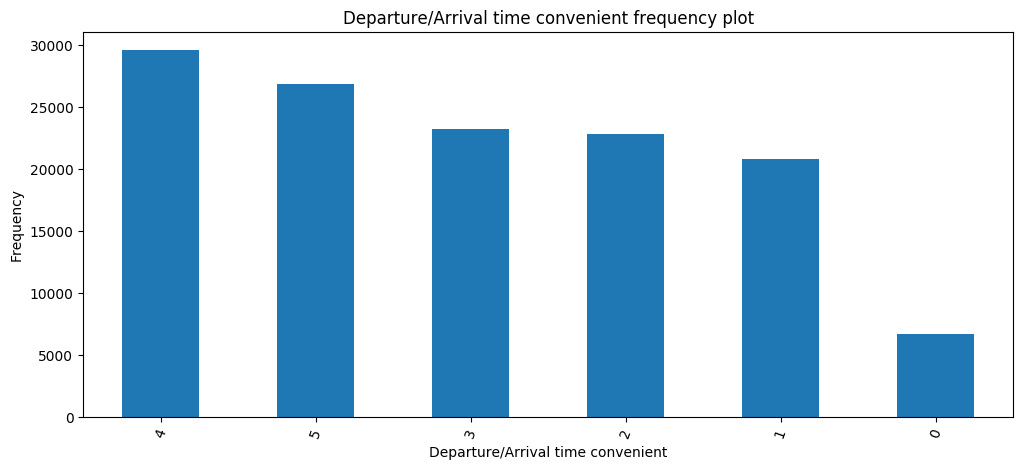

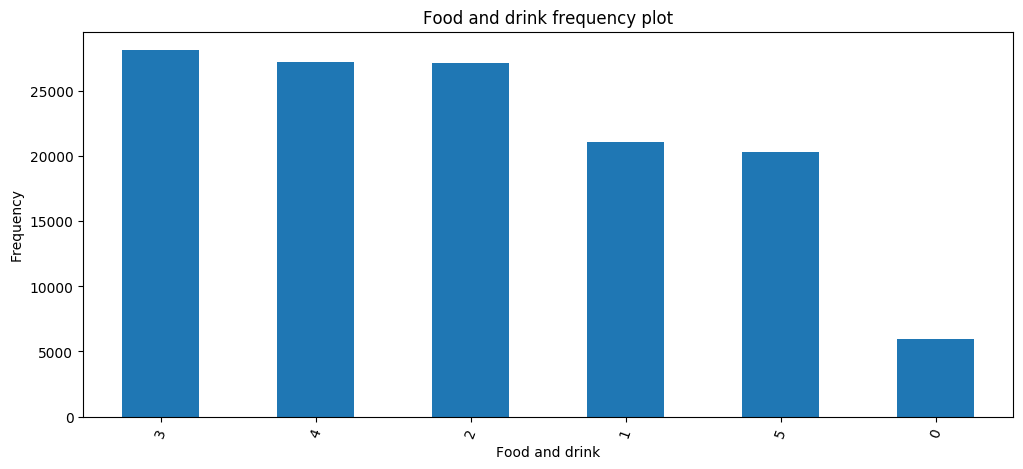

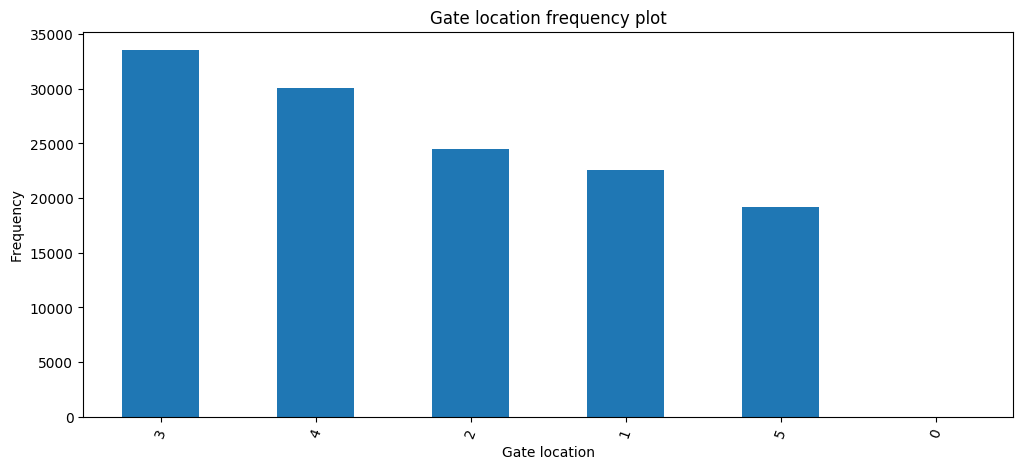

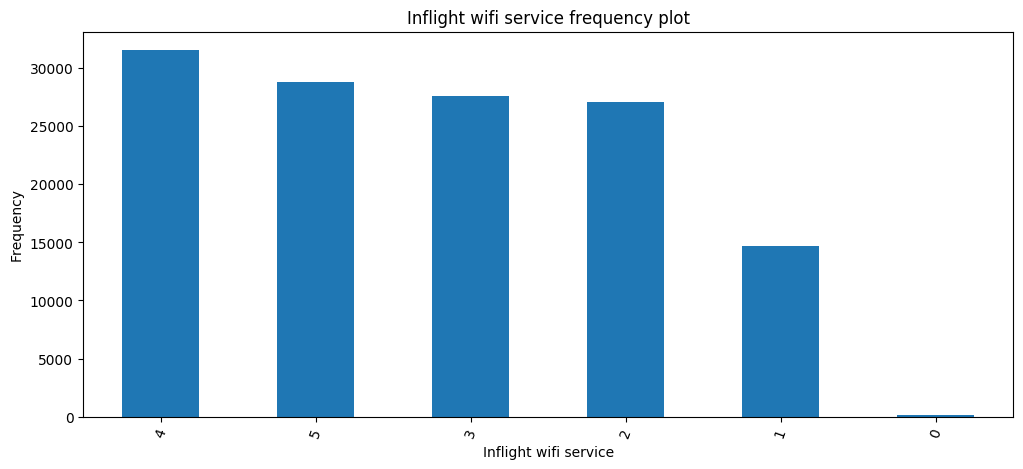

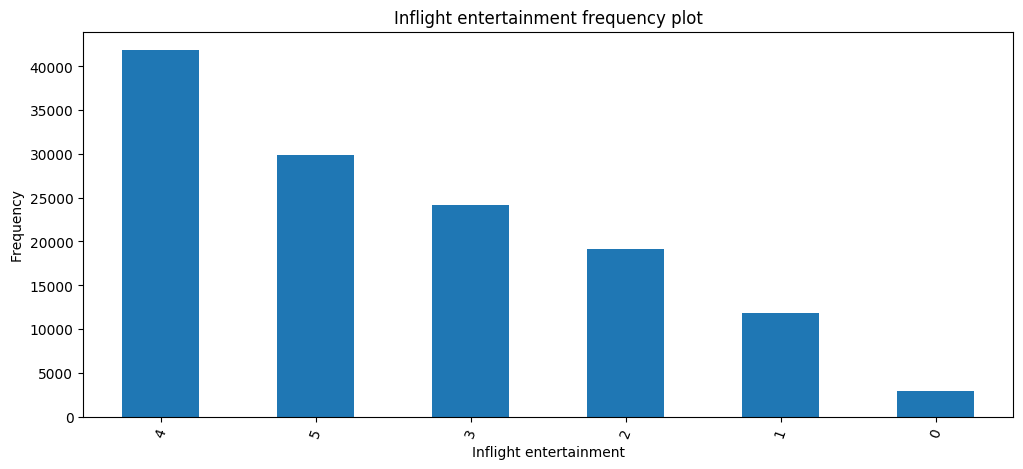

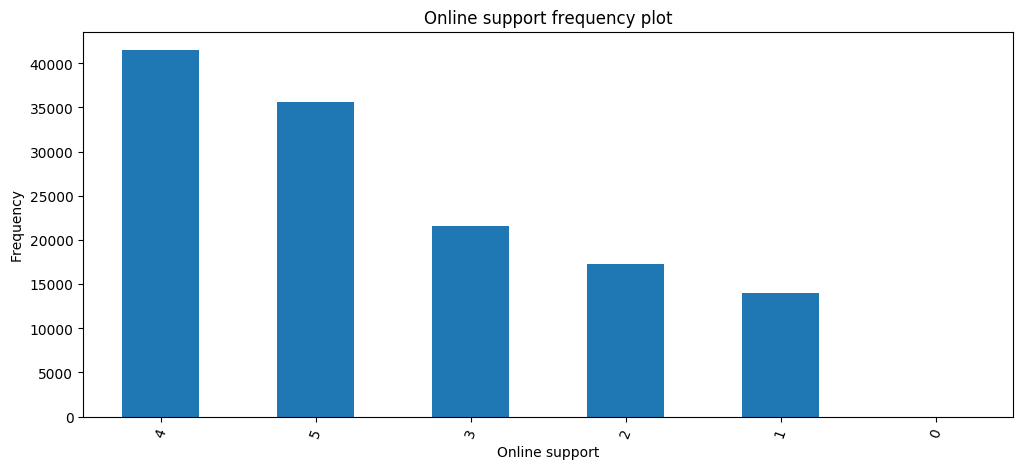

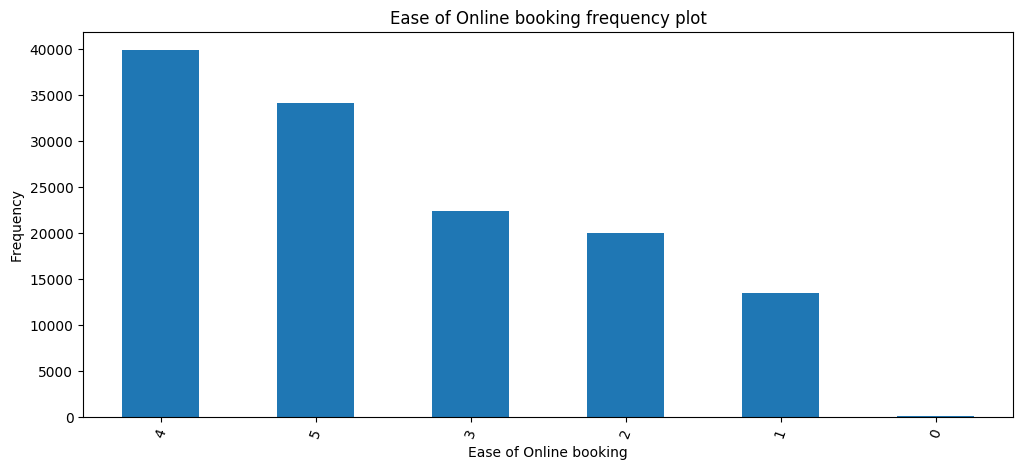

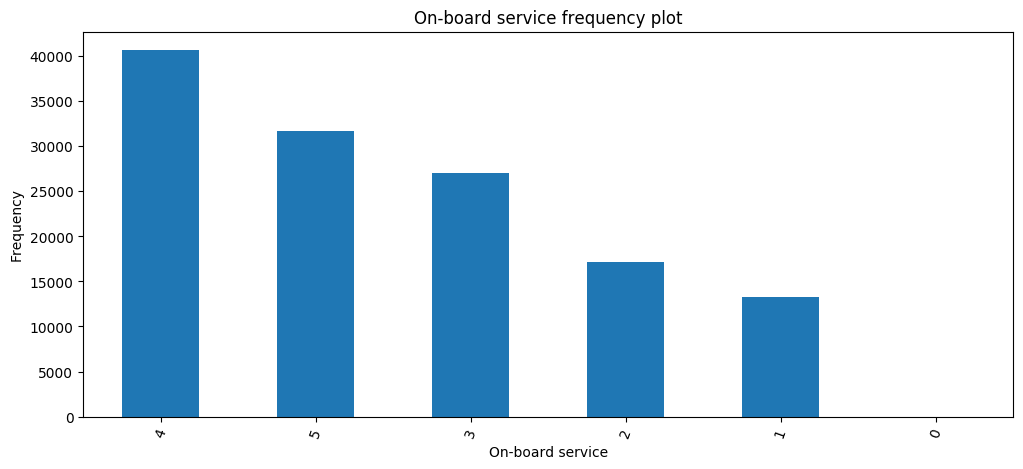

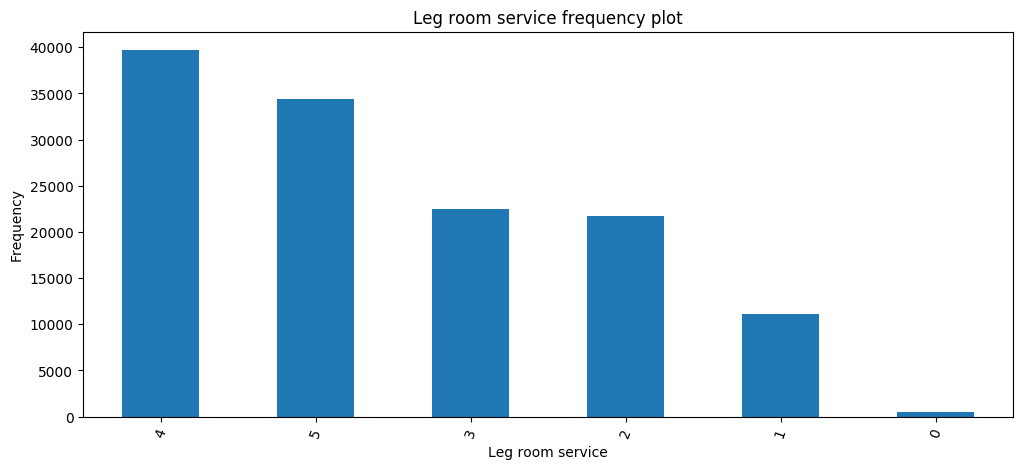

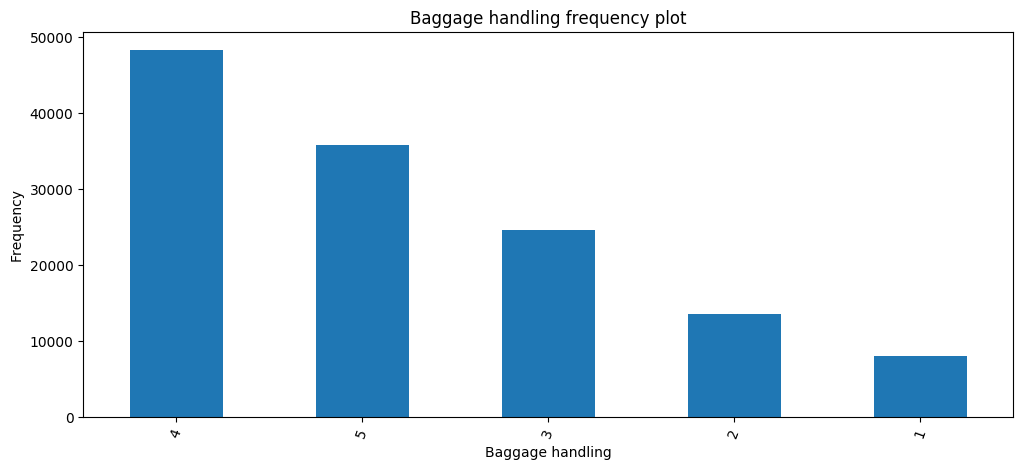

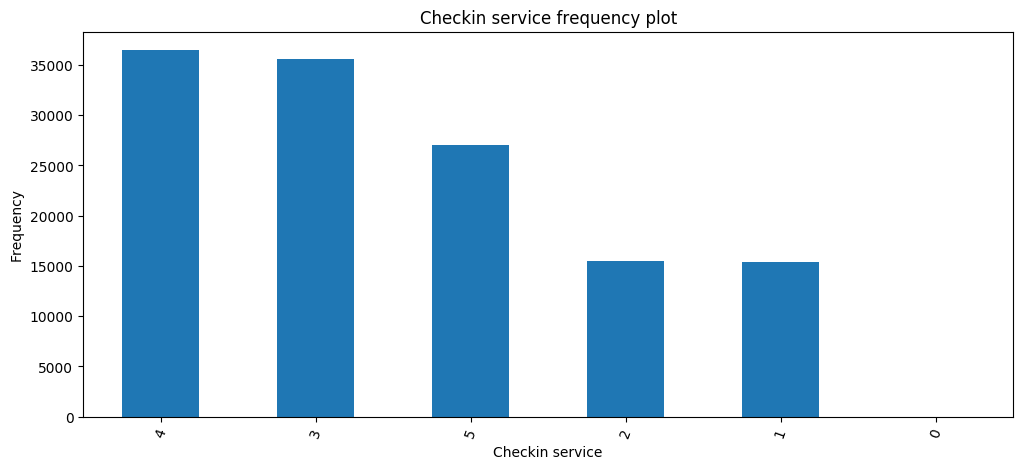

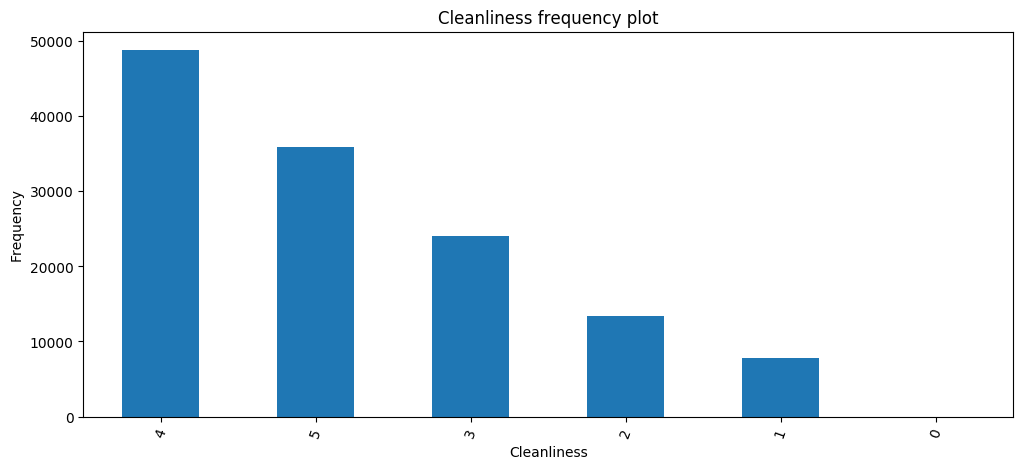

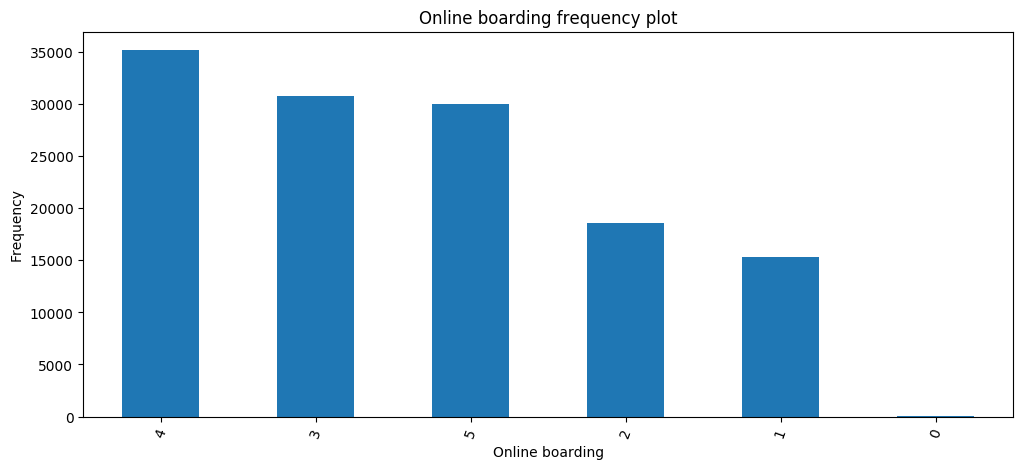

In [24]:
# categorical variables
cat_var = [feature for feature in air_sat.columns if feature not in num_var]

# categorical variables value counts
for feature in cat_var:
    # copy the dataframe
    df=air_sat.copy()
    plt.figure(figsize=(12, 5))
    df[feature].value_counts().plot.bar()
    plt.title(f'{feature} frequency plot')
    plt.ylabel('Frequency')
    plt.xlabel(feature)
    plt.xticks(rotation = 70)
    plt.show()

### Relationship of categorical variables with the target variable

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


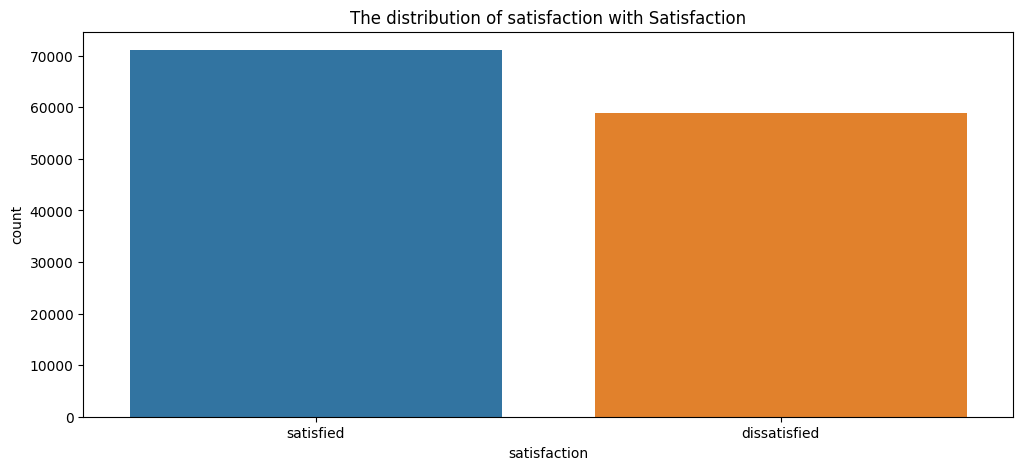

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


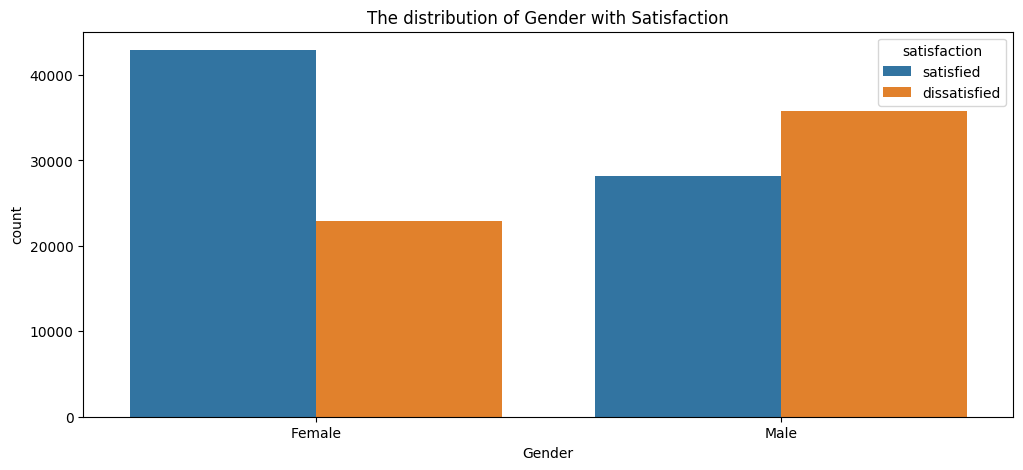

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


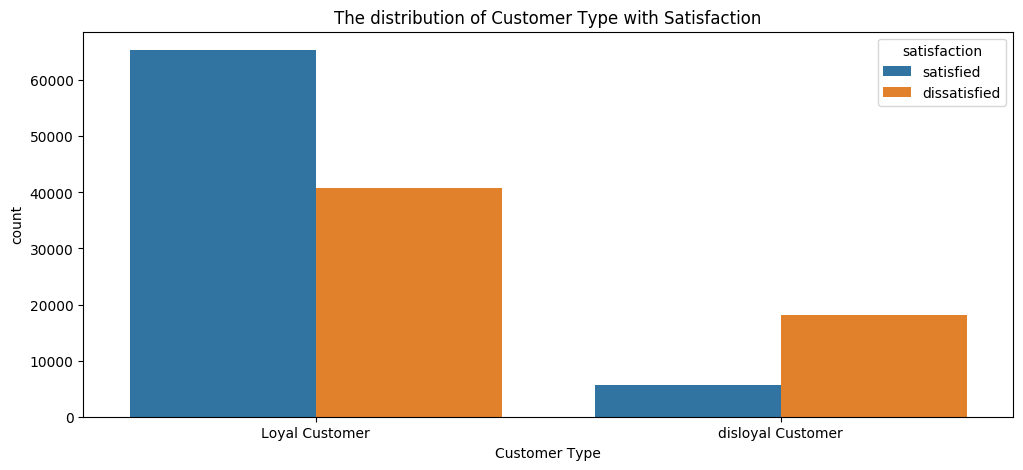

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


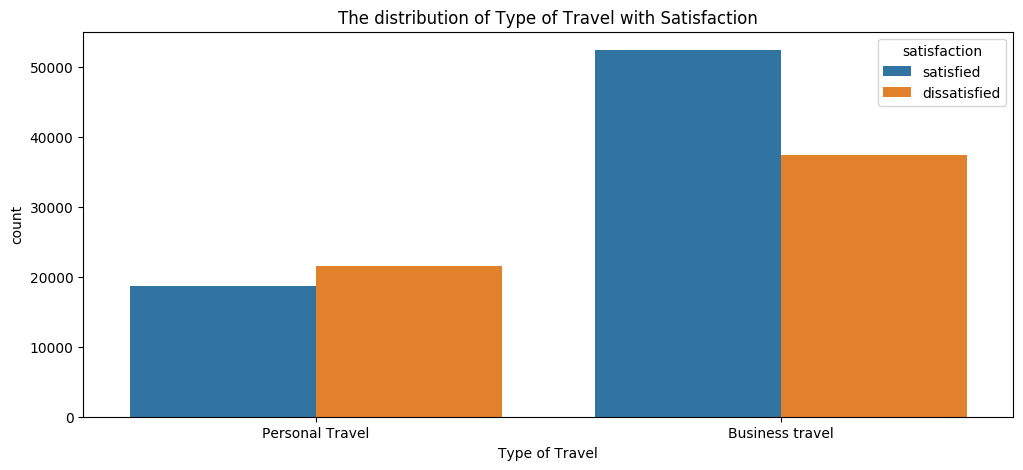

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


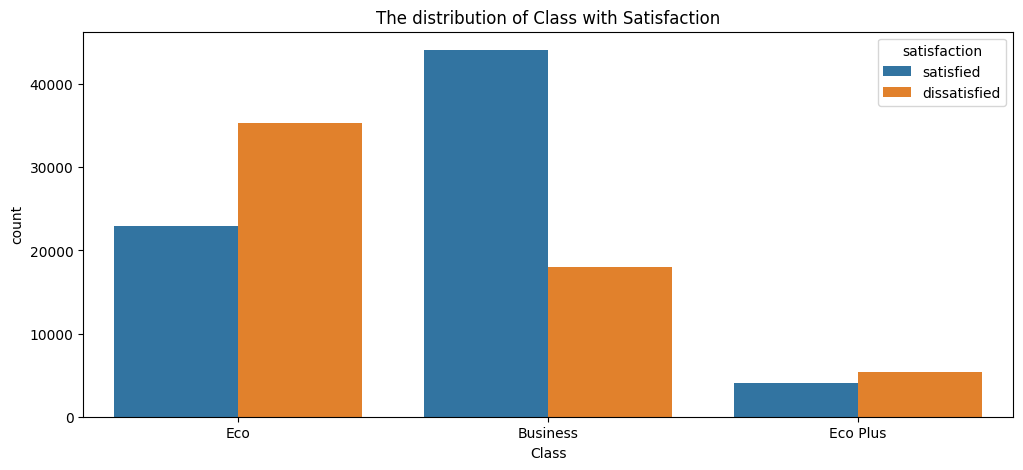

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


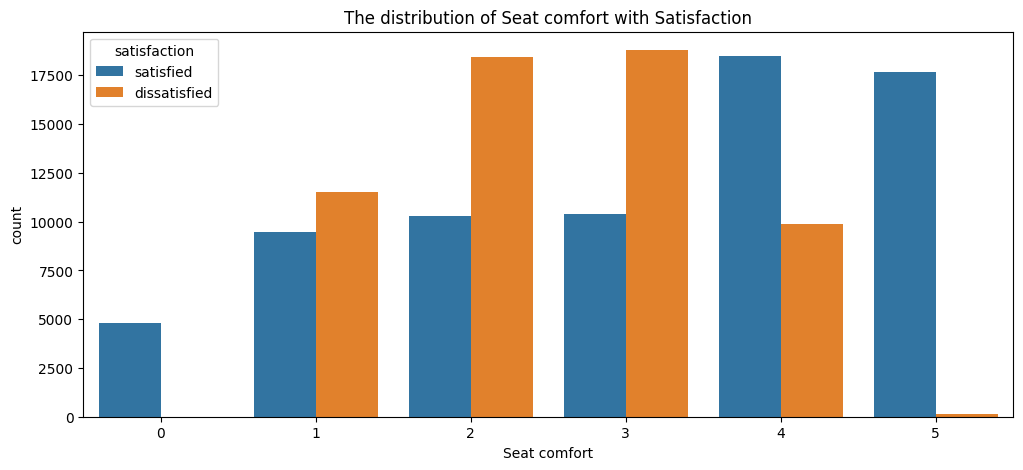

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


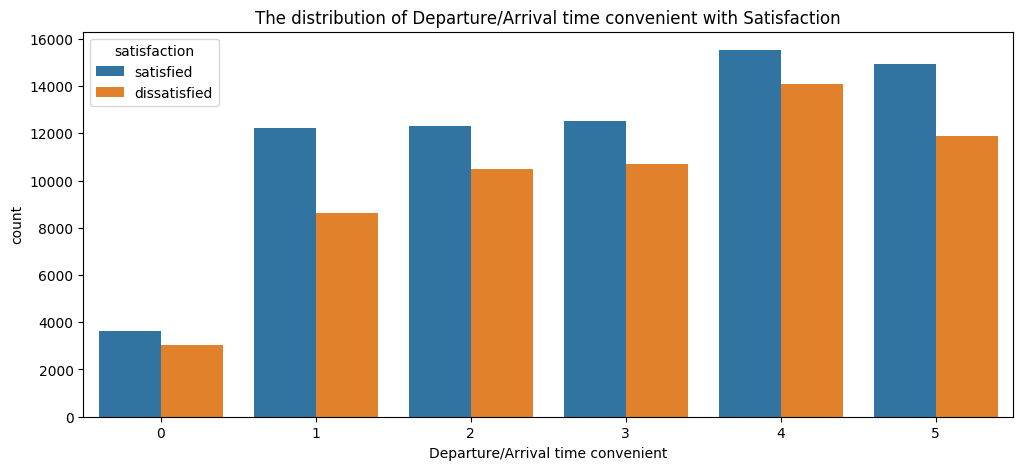

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


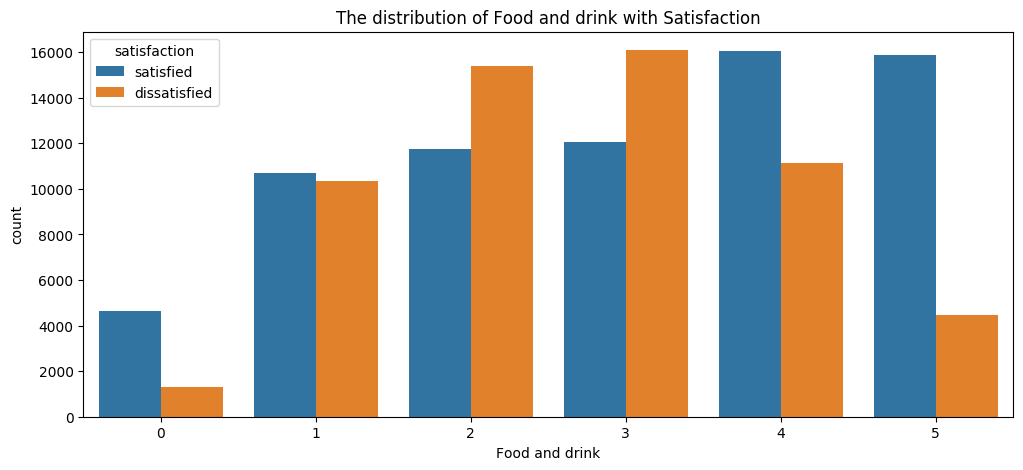

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


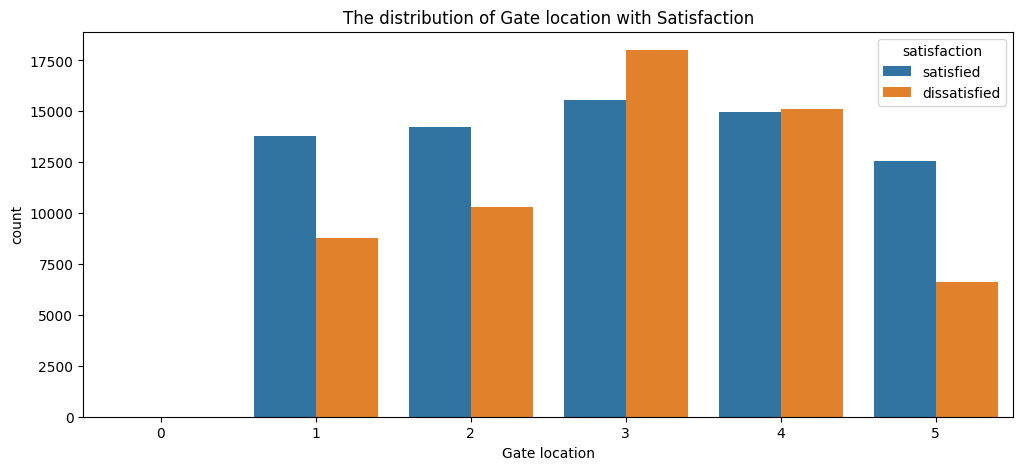

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


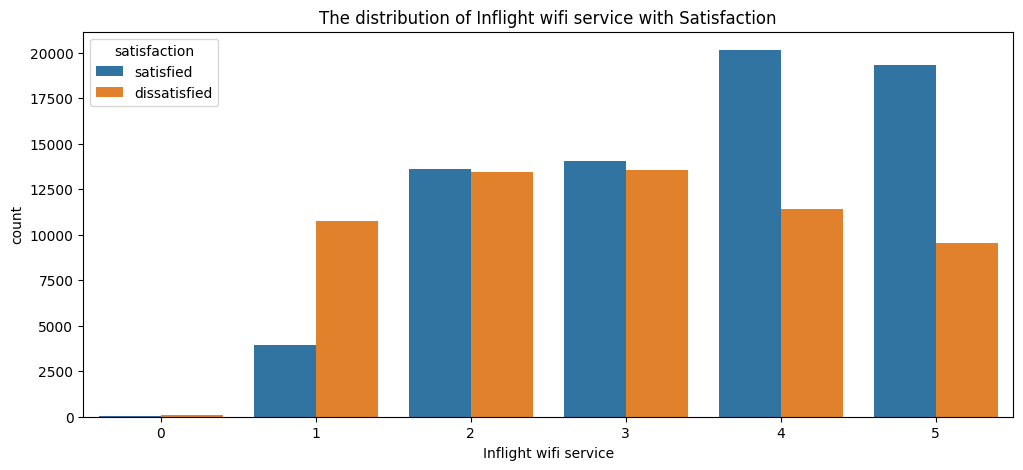

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


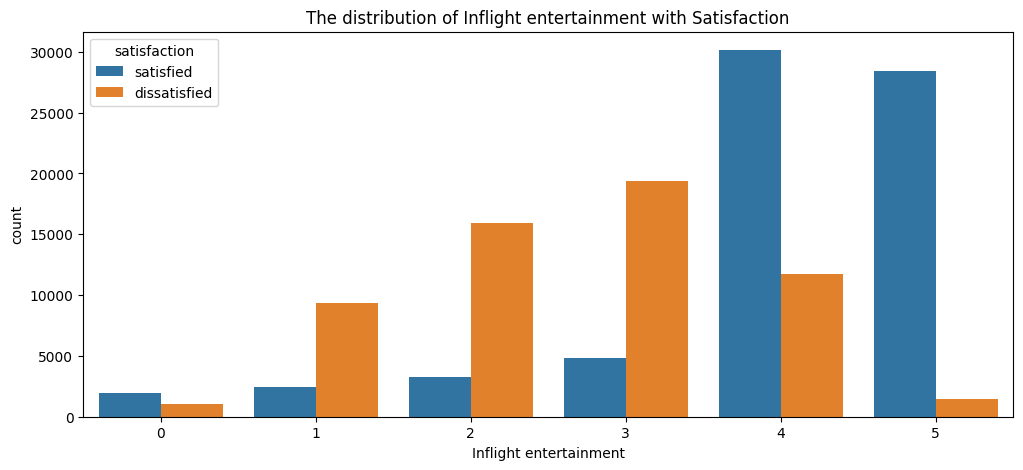

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


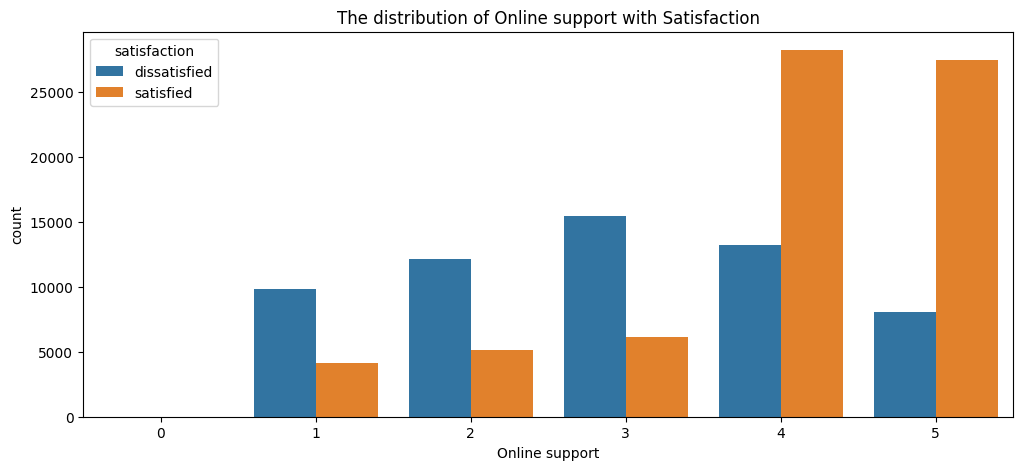

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


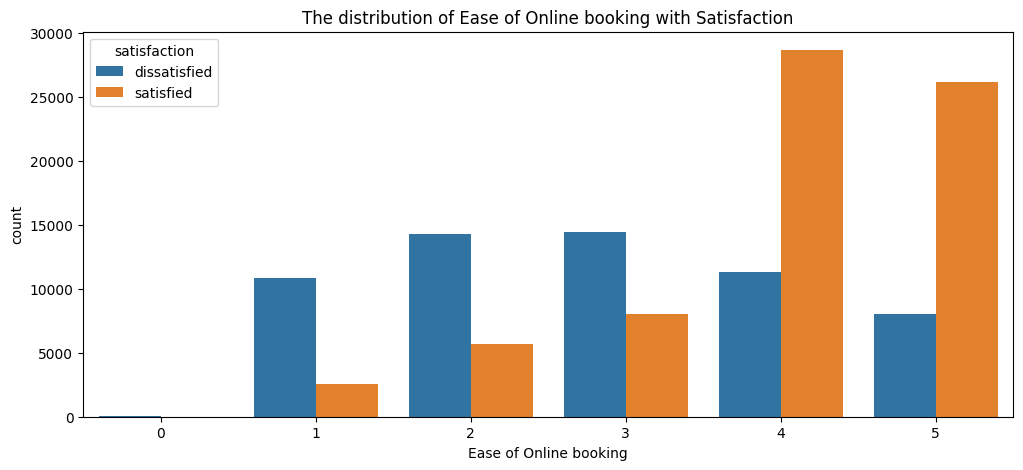

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


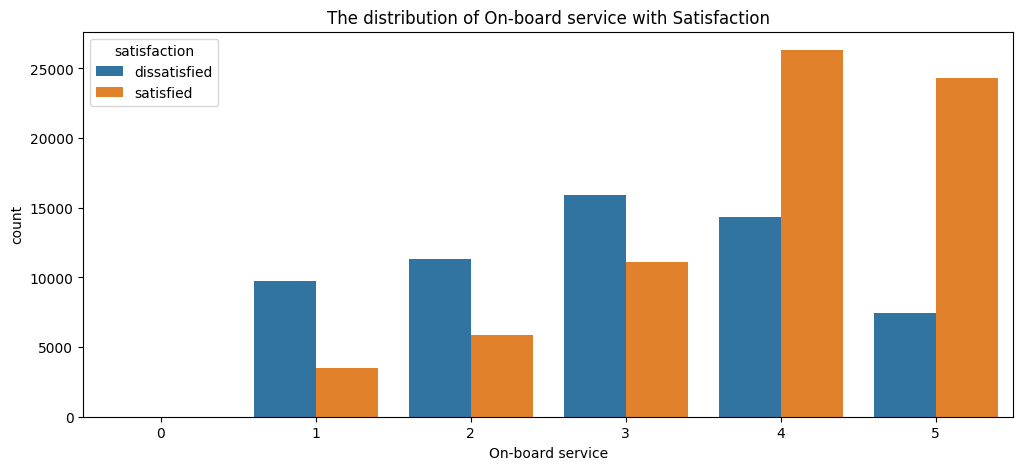

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


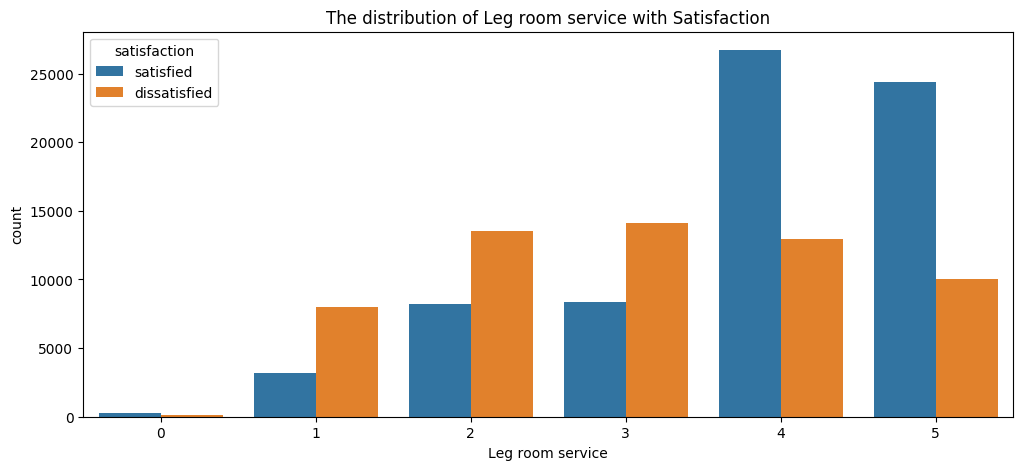

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


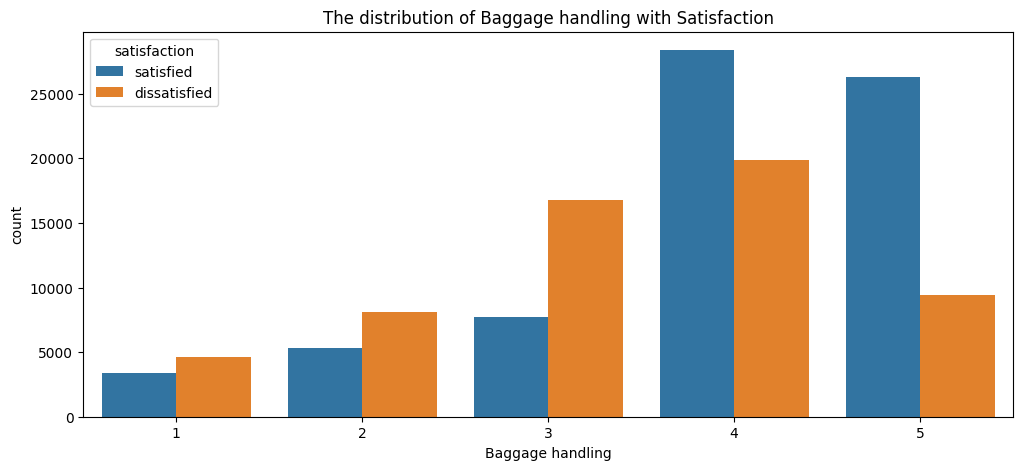

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


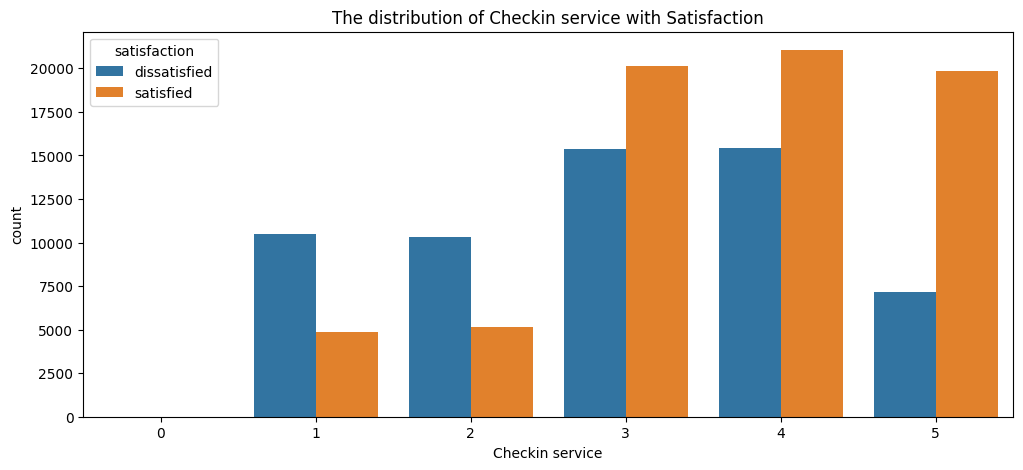

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


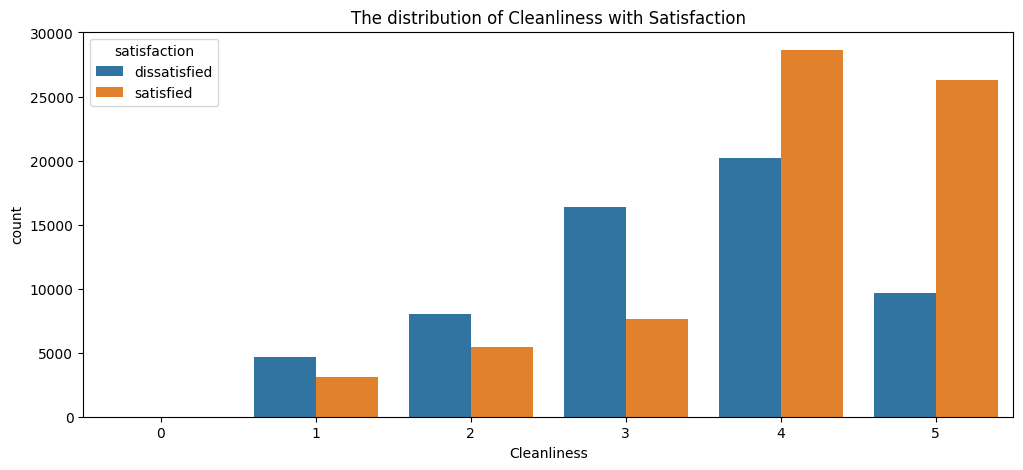

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


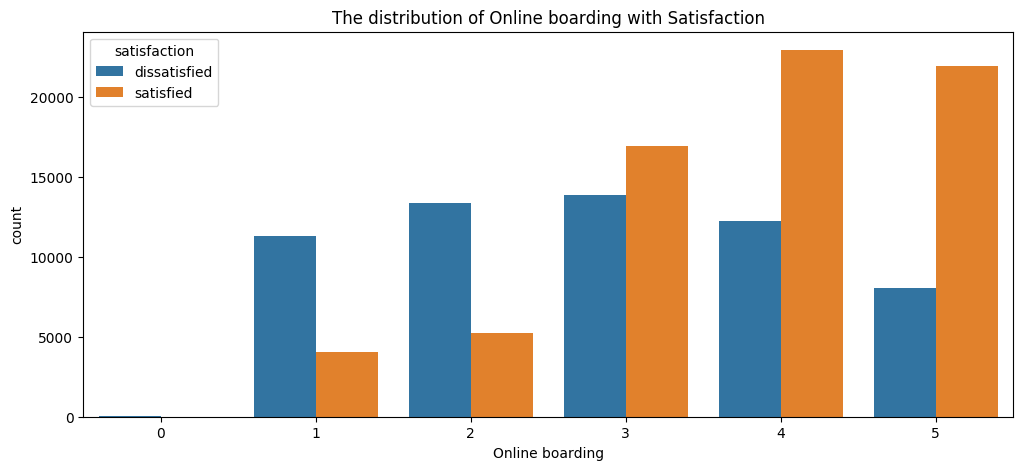

In [26]:
### relationship of categorical variables with the target variable
for feature in cat_var:
    # copy data
    df=air_sat.copy()
    plt.figure(figsize = (12, 5))
    sns.countplot(data = air_sat, x=feature, hue='satisfaction')
    plt.title(f'The distribution of {feature} with Satisfaction')
    plt.show()

## Feature Engineering

In [27]:
# One hot encoding of the Categorical variables
air_sat = pd.get_dummies(air_sat, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)
air_sat.head()

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,satisfied,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,False,False,True,True,False
1,satisfied,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,True,False,True,False,False
2,satisfied,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,False,False,True,True,False
3,satisfied,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,False,False,True,True,False
4,satisfied,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,False,False,True,True,False


### Split the dataset

In [28]:
# target and predictor variables
X=air_sat.drop('satisfaction', axis = 1)
y=air_sat['satisfaction']

### Let's perform Train test split

In [29]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
print('X_train shape: ', X_train.shape)
print('X_train shape: ', X_test.shape)
print('X_train shape: ', y_train.shape)
print('X_train shape: ', y_test.shape)

X_train shape:  (90916, 23)
X_train shape:  (38964, 23)
X_train shape:  (90916,)
X_train shape:  (38964,)


In [31]:
X_train.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
18386,40,1586,3,3,3,3,2,4,4,4,4,4,4,4,4,5,4,1.0,False,False,True,True,False
115613,49,1974,1,1,1,1,5,4,5,5,5,5,5,3,5,4,0,0.0,False,False,False,False,False
68138,21,4373,1,3,3,3,1,1,1,1,1,5,4,2,3,1,0,1.0,False,False,False,False,False
78244,54,1471,2,1,4,4,3,2,3,3,2,5,4,4,4,3,4,6.0,True,False,False,True,False
34472,68,1905,4,4,4,1,2,4,2,2,4,5,4,5,4,2,6,0.0,True,False,True,True,False


In [32]:
X_train.isnull().sum()

,0
Age,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0
Inflight wifi service,0
Inflight entertainment,0
Online support,0
Ease of Online booking,0


### Handle Missing Values

In [33]:
# compute median
median_na = X_train['Arrival Delay in Minutes'].median()

# fill na with median
X_train['Arrival Delay in Minutes'] = X_train['Arrival Delay in Minutes'].fillna(median_na)

In [34]:
# X_test median
median_test = X_test['Arrival Delay in Minutes'].median()

X_test['Arrival Delay in Minutes'] = X_test['Arrival Delay in Minutes'].fillna(median_test)

### Feature Selection

### Chi2 for the Categorical Variables

In [35]:
# import chi2
from sklearn.feature_selection import chi2

In [36]:
chi2_cols =['Seat comfort','Departure/Arrival time convenient','Food and drink', 'Gate location', 'Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding','Gender_Male','Customer Type_disloyal Customer','Type of Travel_Personal Travel','Class_Eco','Class_Eco Plus']

In [37]:
f_p_values = chi2(X_train[chi2_cols], y_train)

In [38]:
f_p_values

(array([3.60106188e+03, 2.86266104e+01, 9.22853032e+02, 9.91567504e+00,
        2.54644679e+03, 1.33236739e+04, 6.73523354e+03, 8.37293474e+03,
        5.25612637e+03, 4.10586580e+03, 2.24740452e+03, 3.09063152e+03,
        2.22258074e+03, 5.28268703e+03, 2.08436923e+03, 6.33665673e+03,
        7.71149019e+02, 3.86852694e+03, 4.17345587e+02]),
 array([0.00000000e+000, 8.77677287e-008, 1.05661013e-202, 1.63877020e-003,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.01141129e-169, 0.00000000e+000, 9.23028197e-093]))

In [39]:
p_val = pd.Series(f_p_values[1])
p_val.index = X_train[chi2_cols].columns

In [40]:
p_val.sort_values(ascending=True)

,0
Seat comfort,0.000000e+00
Customer Type_disloyal Customer,0.000000e+00
Gender_Male,0.000000e+00
Online boarding,0.000000e+00
Cleanliness,0.000000e+00
Checkin service,0.000000e+00
Baggage handling,0.000000e+00
Class_Eco,0.000000e+00
Leg room service,0.000000e+00
Ease of Online booking,0.000000e+00


The lower the p value the more dependent the target variable on the independent features. A p value of Zero is statistically significant, it shows that the difference between the dependent and independent features are significant

In [41]:
#### categorical variables to drop
cols_to_drop = ['Food and drink', 'Type of Travel_Personal Travel', 'Class_Eco Plus', 'Departure/Arrival time convenient', 'Gate location']

### Variance Threshold for Numerical Variables

In [42]:
num_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', ]

In [43]:
# import VarianceThreshold
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=10)

vt.fit(X_train[num_cols])

vt.get_support()

array([ True,  True,  True,  True])

#### All the numerical features are of high varinace

In [44]:
# drop columns
X_train = X_train.drop(cols_to_drop, axis = 1)
X_test = X_test.drop(cols_to_drop, axis = 1)

In [45]:
X_train.head()

,Age,Flight Distance,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Class_Eco
18386,40,1586,3,2,4,4,4,4,4,4,4,4,5,4,1.0,False,False,True
115613,49,1974,1,5,4,5,5,5,5,5,3,5,4,0,0.0,False,False,False
68138,21,4373,1,1,1,1,1,1,5,4,2,3,1,0,1.0,False,False,False
78244,54,1471,2,3,2,3,3,2,5,4,4,4,3,4,6.0,True,False,True
34472,68,1905,4,2,4,2,2,4,5,4,5,4,2,6,0.0,True,False,True


### Standardisation

In [46]:
# import standardisation
from sklearn.preprocessing import StandardScaler

# create object
sts = StandardScaler()

# train data
X_train = sts.fit_transform(X_train)

In [47]:
# test data
X_test = sts.fit_transform(X_test)

### Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Transform labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

### Modelling

## Logistic Regression

In [49]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# instantiate
lgr = LogisticRegression()

# train
lgr.fit(X_train, y_train)

LogisticRegression()

In [50]:
# predict test data
y_pred = lgr.predict(X_test)
y_pred

array(['satisfied', 'dissatisfied', 'satisfied', ..., 'dissatisfied',
       'dissatisfied', 'satisfied'], dtype=object)

In [51]:
results = pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred})
results.head()

,Actual Value,Predicted Value
103044,satisfied,satisfied
43282,dissatisfied,dissatisfied
65543,satisfied,satisfied
65083,satisfied,satisfied
76496,dissatisfied,dissatisfied


### Model Evaluation

In [52]:
lgr.score(X_train, y_train)

0.8259382286946192

In [53]:
lgr.score(X_test, y_test)

0.825787906785751

In [54]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[14086,  3468],
       [ 3320, 18090]])

<Axes: >

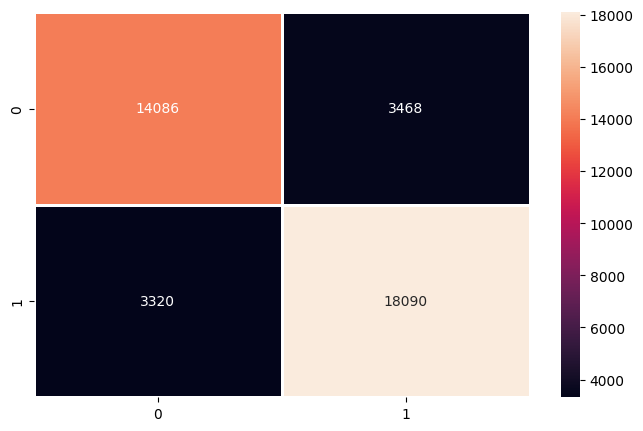

In [56]:
# confusion matrix heatmap
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt = 'd', linewidth = 2)

In [57]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

dissatisfied       0.81      0.80      0.81     17554
   satisfied       0.84      0.84      0.84     21410

    accuracy                           0.83     38964
   macro avg       0.82      0.82      0.82     38964
weighted avg       0.83      0.83      0.83     38964



## Naive Bayes Classifier

In [58]:
# import gaussianNB
from sklearn.naive_bayes import GaussianNB

# create object
nb = GaussianNB()

# train the data
nb_data = nb.fit(X_train, y_train)

In [59]:
# accuracy score
nb.score(X_train, y_train)

0.8090655110211624

In [60]:
# predict
y_pred_nb = nb.predict(X_test)

# test accuracy score
nb.score(X_test, y_test)

0.810466071245252

### Model Evaluation

In [61]:
confusion_matrix(y_test, y_pred_nb)

array([[13746,  3808],
       [ 3577, 17833]])

<Axes: >

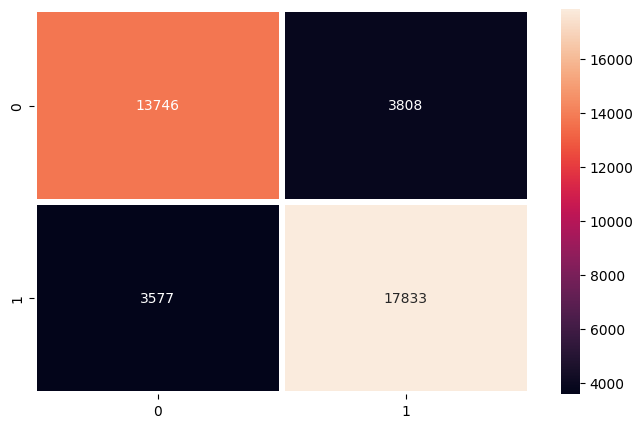

In [62]:
# confusion matrix heatmap
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt = 'd', linewidth = 3)

### Modelling: DecisionTreeClassifier

In [63]:
# import module
from sklearn.tree import DecisionTreeClassifier

# create object
dtc_clf_base = DecisionTreeClassifier()

# fit
dtc_clf_base.fit(X_train, y_train)

# predict
y_pred_dtc_base = dtc_clf_base.predict(X_test)

### Model Evaluation

In [64]:
# train score
dtc_clf_base.score(X_train, y_train)

1.0

In [65]:
# test score
dtc_clf_base.score(X_test, y_test)

0.9152294425623653

In [66]:
# confusion matrix
confusion_matrix(y_test, y_pred_dtc_base)

array([[15865,  1689],
       [ 1614, 19796]])

<Axes: >

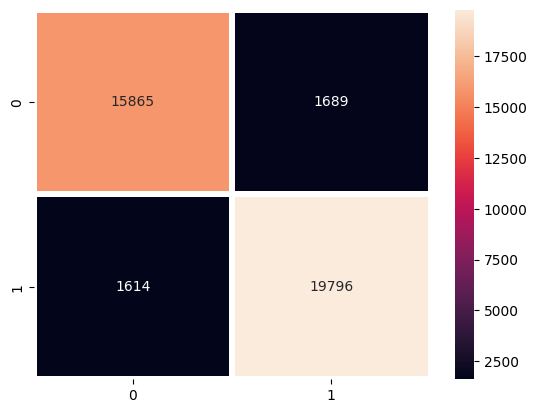

In [67]:
# heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_dtc_base),
            annot=True, fmt = 'd', linewidth = 3)

In [68]:
# classification report
print(classification_report(y_test, y_pred_dtc_base))

              precision    recall  f1-score   support

dissatisfied       0.91      0.90      0.91     17554
   satisfied       0.92      0.92      0.92     21410

    accuracy                           0.92     38964
   macro avg       0.91      0.91      0.91     38964
weighted avg       0.92      0.92      0.92     38964



### Modelling: RandomForestClassifier

In [69]:
# import module
from sklearn.ensemble import RandomForestClassifier

# create object
rfc_clf_base = RandomForestClassifier()

# fit
rfc_clf_base.fit(X_train, y_train)

# predict
y_pred_rfc_base = rfc_clf_base.predict(X_test)

### Model Evaluation

In [70]:
# train score
rfc_clf_base.score(X_train, y_train)

0.9999890008359364

In [71]:
# train score
rfc_clf_base.score(X_test, y_test)

0.9445385484036547

In [72]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_rfc_base))

[[16635   919]
 [ 1242 20168]]


<Axes: >

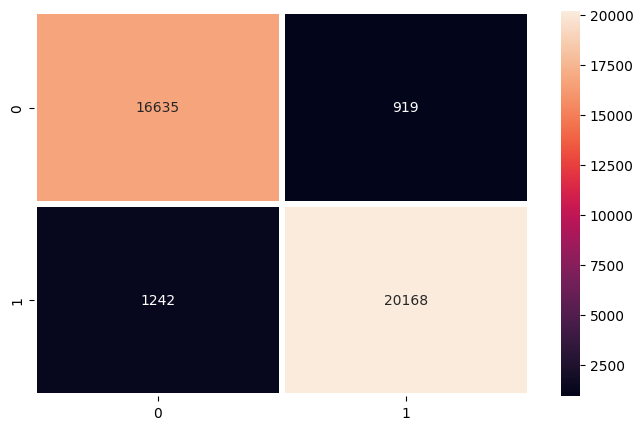

In [73]:
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc_base), annot = True, fmt = 'd', linewidth = 3)

In [74]:
# classification report
print(classification_report(y_test, y_pred_rfc_base))

              precision    recall  f1-score   support

dissatisfied       0.93      0.95      0.94     17554
   satisfied       0.96      0.94      0.95     21410

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964



### Modelling: AdaboostClassifier

In [75]:
# import module
from sklearn.ensemble import AdaBoostClassifier

# create object
abc_clf_base = AdaBoostClassifier()

# fit
abc_clf_base.fit(X_train, y_train)

# predict
y_pred_abc_base = abc_clf_base.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### Model Evaluation

In [76]:
# train score
abc_clf_base.score(X_train, y_train)

0.8910972766069779

In [77]:
# test score
abc_clf_base.score(X_test, y_test)

0.8904629914793143

In [78]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_abc_base))

[[15525  2029]
 [ 2239 19171]]


<Axes: >

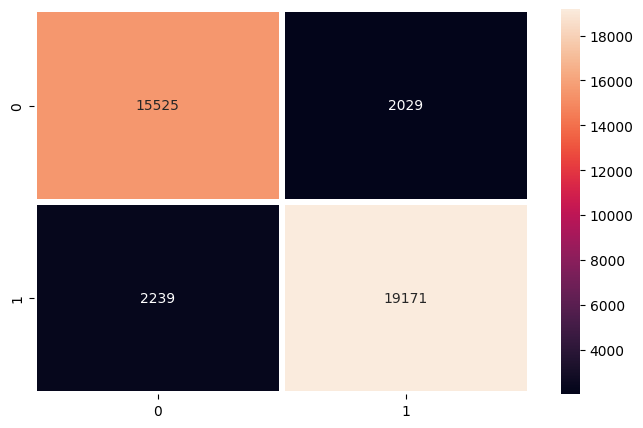

In [79]:
# heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_abc_base),
            annot = True, fmt = 'd', linewidth = 3)

In [80]:
# classification report
print(classification_report(y_test, y_pred_abc_base))

              precision    recall  f1-score   support

dissatisfied       0.87      0.88      0.88     17554
   satisfied       0.90      0.90      0.90     21410

    accuracy                           0.89     38964
   macro avg       0.89      0.89      0.89     38964
weighted avg       0.89      0.89      0.89     38964



### Modelling: GradientBooatingClassifier

In [81]:
# import module
from sklearn.ensemble import GradientBoostingClassifier

# create object
gbc_clf_base = GradientBoostingClassifier()

# fit
gbc_clf_base.fit(X_train, y_train)

# predict
y_pred_gbc_base = gbc_clf_base.predict(X_test)

In [82]:
# train score
gbc_clf_base.score(X_train, y_train)

0.9097078622024726

In [83]:
# train score
gbc_clf_base.score(X_test, y_test)

0.9098141874550868

In [84]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_gbc_base))

[[15801  1753]
 [ 1761 19649]]


<Axes: >

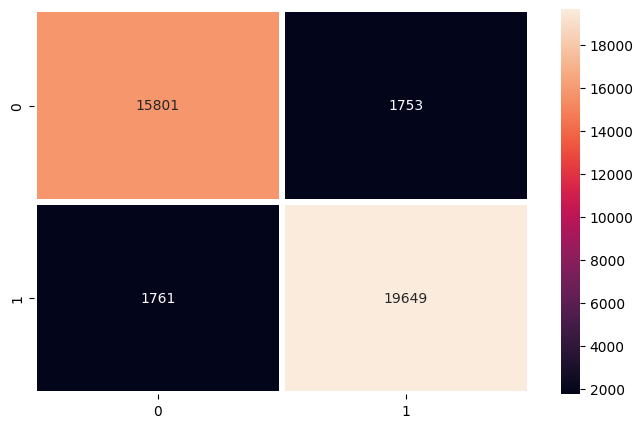

In [85]:
# heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_gbc_base),
            annot = True, fmt = 'd', linewidth = 3)

In [87]:
# classification report
print(classification_report(y_test, y_pred_gbc_base))

              precision    recall  f1-score   support

dissatisfied       0.90      0.90      0.90     17554
   satisfied       0.92      0.92      0.92     21410

    accuracy                           0.91     38964
   macro avg       0.91      0.91      0.91     38964
weighted avg       0.91      0.91      0.91     38964



In [86]:
# Test score comparison
print('LogisticRegression: ', lgr.score(X_test, y_test))
print('NaiveBayesClassifier: ', nb.score(X_test, y_test))
print('DecisonTreeClassifier: ', dtc_clf_base.score(X_test, y_test))
print('RandomForestClassifier: ', rfc_clf_base.score(X_test, y_test))
print('AdaBoostClassifier: ', abc_clf_base.score(X_test, y_test))
print('GradientBoostingClassifier: ', gbc_clf_base.score(X_test, y_test))

LogisticRegression:  0.825787906785751
NaiveBayesClassifier:  0.810466071245252
DecisonTreeClassifier:  0.9152294425623653
RandomForestClassifier:  0.9445385484036547
AdaBoostClassifier:  0.8904629914793143
GradientBoostingClassifier:  0.9098141874550868


### Modelling: VotingClassifier

In [88]:
# import module
from sklearn.ensemble import VotingClassifier

# create object
lr_reg = LogisticRegression()
nbc_clf = GaussianNB()
dtc_clf = DecisionTreeClassifier()
rfc_clf = RandomForestClassifier()
abc_clf = AdaBoostClassifier()
gbc_clf = GradientBoostingClassifier()

In [89]:
vtc_clf = VotingClassifier(estimators=[('lr_reg', lr_reg), ('nbc_clf', nbc_clf),
                                       ('dtc_clf', dtc_clf), ('rfc_clf', rfc_clf),
                                       ('abc_clf', abc_clf), ('gbc_clf', gbc_clf)], voting='soft')

In [90]:
# fit
vtc_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('lr_reg', LogisticRegression()),
                             ('nbc_clf', GaussianNB()),
                             ('dtc_clf', DecisionTreeClassifier()),
                             ('rfc_clf', RandomForestClassifier()),
                             ('abc_clf', AdaBoostClassifier()),
                             ('gbc_clf', GradientBoostingClassifier())],
                 voting='soft')

In [91]:
# predict
y_pred_vtc = vtc_clf.predict(X_test)
y_pred_vtc

array(['satisfied', 'dissatisfied', 'satisfied', ..., 'dissatisfied',
       'dissatisfied', 'satisfied'], dtype=object)

In [103]:
vtc_clf.predict_proba(X_test)

array([[0.09863948, 0.90136052],
       [0.90073004, 0.09926996],
       [0.10134372, 0.89865628],
       ...,
       [0.89057807, 0.10942193],
       [0.85253607, 0.14746393],
       [0.10497751, 0.89502249]])

In [92]:
# Actual class vs predicted class
# DataFrame
results = pd.DataFrame({'Actual':y_pred_vtc, 'Predicted':y_test})
results.head()

,Actual,Predicted
103044,satisfied,satisfied
43282,dissatisfied,dissatisfied
65543,satisfied,satisfied
65083,satisfied,satisfied
76496,dissatisfied,dissatisfied


In [93]:
# incorrectly classified
results[results['Actual'] != results['Predicted']].head()

,Actual,Predicted
59705,dissatisfied,satisfied
70155,dissatisfied,satisfied
35784,dissatisfied,satisfied
34138,satisfied,dissatisfied
970,satisfied,dissatisfied


In [94]:
vtc_clf.score(X_train, y_train)

0.9598530511681113

In [95]:
vtc_clf.score(X_test, y_test)

0.92303151627143

In [96]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_vtc))

[[15938  1616]
 [ 1383 20027]]


<Axes: >

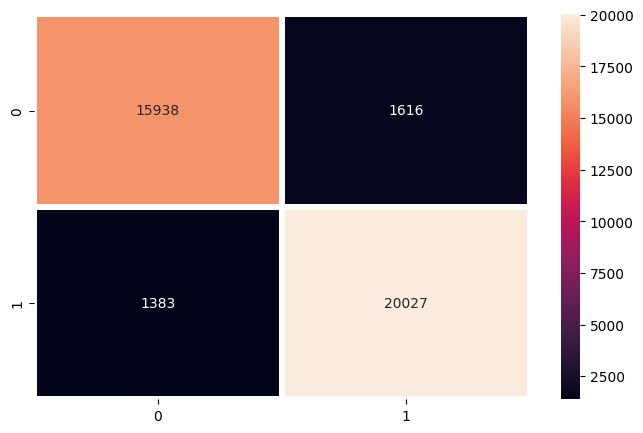

In [97]:
# heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_vtc),
            annot = True, fmt = 'd', linewidth = 3)

In [98]:
# classification report
print(classification_report(y_test, y_pred_vtc))

              precision    recall  f1-score   support

dissatisfied       0.92      0.91      0.91     17554
   satisfied       0.93      0.94      0.93     21410

    accuracy                           0.92     38964
   macro avg       0.92      0.92      0.92     38964
weighted avg       0.92      0.92      0.92     38964



## AUC-ROC Curve

In [99]:

# importing libraries for roc curve and classifier
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [100]:

# Initialize the models

models = {
    'Logistic Regression': LogisticRegression(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


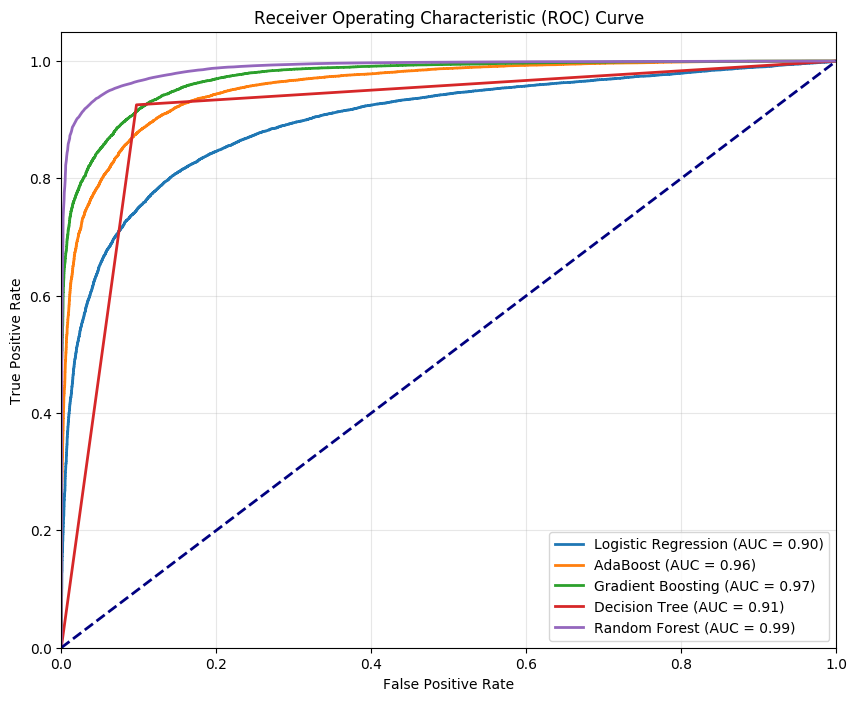

In [101]:
# Initialize plot
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Fit model
    model.fit(X_train, y_train_encoded)
    # Predict probabilities
    y_probs = model.predict_proba(X_test)[:, 1]
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test_encoded, y_probs)
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

Random Forest Classifier demonstrates the best performance among the multiple classifiers as it is the closest to the top left corner. It has an AUC of 0.99

In [102]:
import numpy as np
from sklearn.metrics import roc_curve

# Assume y_true are the true labels and y_scores are the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_probs)

# Calculate Youden's J statistic
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold}')

Optimal Threshold: 0.54


The optimal threshold for classification is 0.54

## Saving Models

In [105]:
import joblib


joblib.dump(lgr, 'Airline Logistic Regression.pkl')
joblib.dump(nb, 'Airline Naive Bayes.pkl')
joblib.dump(dtc_clf, 'Airline Decision Tree.pkl')
joblib.dump(rfc_clf, 'Airline Random Forest.pkl')
joblib.dump(abc_clf, 'Airline AdaBoost.pkl')
joblib.dump(gbc_clf, 'Airline Gradient Boosting.pkl')

['Airline Gradient Boosting.pkl']